Часть 1. EDA

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [130]:
df = pd.read_csv ('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [131]:
df.shape

(1000, 10)

In [132]:
#Unnamed: 0  является ID клиента. Для нас данный столбец не является полезным.

In [133]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [135]:
df.Job.value_counts ()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [136]:
df.Housing.value_counts ()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [137]:
df.rename(columns = {'Saving accounts':'Saving_accounts'}, inplace = True )
df.rename(columns = {'Checking account':'Checking_account'}, inplace = True )
df.rename(columns = {'Credit amount':'Credit_amount'}, inplace = True )

In [138]:
df.Checking_account.value_counts ()

little      274
moderate    269
rich         63
Name: Checking_account, dtype: int64

In [139]:
df.Saving_accounts.value_counts ()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving_accounts, dtype: int64

In [140]:
df.Purpose.value_counts ()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

In [141]:
df[['Saving_accounts', 'Checking_account']] = df[['Saving_accounts', 'Checking_account']]. fillna ('no_data')

In [142]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,male,2,own,no_data,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,no_data,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [143]:
Saving_accounts = {"Saving_accounts":     {"no_data": 0, "little": 1, "moderate": 2, "quite rich": 3, "rich": 4  }}
df= df.replace(Saving_accounts)
Checking_account = {"Checking_account":     {"no_data": 0, "little": 1, "moderate": 2, "rich": 4 }}
df= df.replace(Checking_account)

In [144]:
from sklearn.preprocessing import LabelEncoder # преобразуем все текстовые данные в численные
labelencoder =  LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Housing'] = labelencoder.fit_transform(df['Housing'])
df['Purpose'] = labelencoder.fit_transform(df['Purpose'])

In [145]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,5
1,22,0,2,1,1,2,5951,48,5
2,49,1,1,1,1,0,2096,12,3
3,45,1,2,0,1,1,7882,42,4
4,53,1,2,0,1,1,4870,24,1


In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(df[['Age','Credit_amount','Duration']])
scaled_features= scaler.transform(df[['Age', 'Credit_amount', 'Duration']])
scaled_data= pd.DataFrame(scaled_features, columns = df[['Age', 'Credit_amount', 'Duration']].columns)
print(scaled_data)

          Age  Credit_amount  Duration
0    0.857143       0.050567  0.029412
1    0.053571       0.313690  0.647059
2    0.535714       0.101574  0.117647
3    0.464286       0.419941  0.558824
4    0.607143       0.254209  0.294118
..        ...            ...       ...
995  0.214286       0.081765  0.117647
996  0.375000       0.198470  0.382353
997  0.339286       0.030483  0.117647
998  0.071429       0.087763  0.602941
999  0.142857       0.238032  0.602941

[1000 rows x 3 columns]


In [147]:
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,5
1,22,0,2,1,1,2,5951,48,5
2,49,1,1,1,1,0,2096,12,3
3,45,1,2,0,1,1,7882,42,4
4,53,1,2,0,1,1,4870,24,1


In [148]:
df_2=df[['Sex', 'Job' , 'Housing', 'Saving_accounts', 'Checking_account']]

In [149]:
df_2=df_2.join(scaled_data, how = 'right')
df_2.head()


,Sex,Job,Housing,Saving_accounts,Checking_account,Age,Credit_amount,Duration
0,1,2,1,0,1,0.857143,0.050567,0.029412
1,0,2,1,1,2,0.053571,0.313690,0.647059
2,1,1,1,1,0,0.535714,0.101574,0.117647
3,1,2,0,1,1,0.464286,0.419941,0.558824
4,1,2,0,1,1,0.607143,0.254209,0.294118


In [150]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               1000 non-null   int32  
 1   Job               1000 non-null   int64  
 2   Housing           1000 non-null   int32  
 3   Saving_accounts   1000 non-null   int64  
 4   Checking_account  1000 non-null   int64  
 5   Age               1000 non-null   float64
 6   Credit_amount     1000 non-null   float64
 7   Duration          1000 non-null   float64
dtypes: float64(3), int32(2), int64(3)
memory usage: 54.8 KB


Далее попробуем различные модели уменьшения размерности и различные методики расчета количества кластеров для k_means.

In [151]:
from sklearn.manifold import TSNE

In [156]:
tsne = TSNE(n_components=2, random_state=42)

In [157]:
X_tsne = tsne.fit_transform(df_2)

In [158]:
X_tsne.shape

(1000, 2)

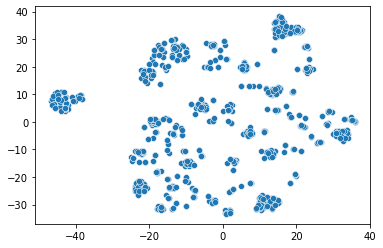

In [159]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

In [160]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_tsne)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\zhuko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


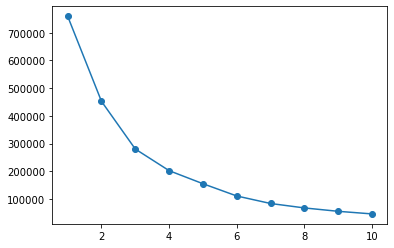

In [161]:
plt.plot(range(1,11), inertia, marker='o');

In [162]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

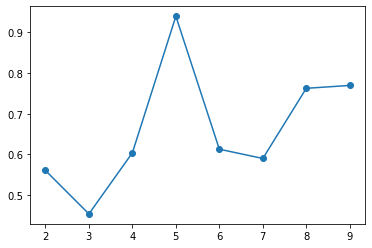

In [163]:
plt.plot(range(2,10), D, marker='o');

In [164]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [165]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.38807008
For n_clusters = 3 The average silhouette_score is : 0.4060793
For n_clusters = 4 The average silhouette_score is : 0.40838355
For n_clusters = 5 The average silhouette_score is : 0.44568053
For n_clusters = 6 The average silhouette_score is : 0.47099763
For n_clusters = 7 The average silhouette_score is : 0.4982142
For n_clusters = 8 The average silhouette_score is : 0.5094826
For n_clusters = 9 The average silhouette_score is : 0.5271912
For n_clusters = 10 The average silhouette_score is : 0.5333376


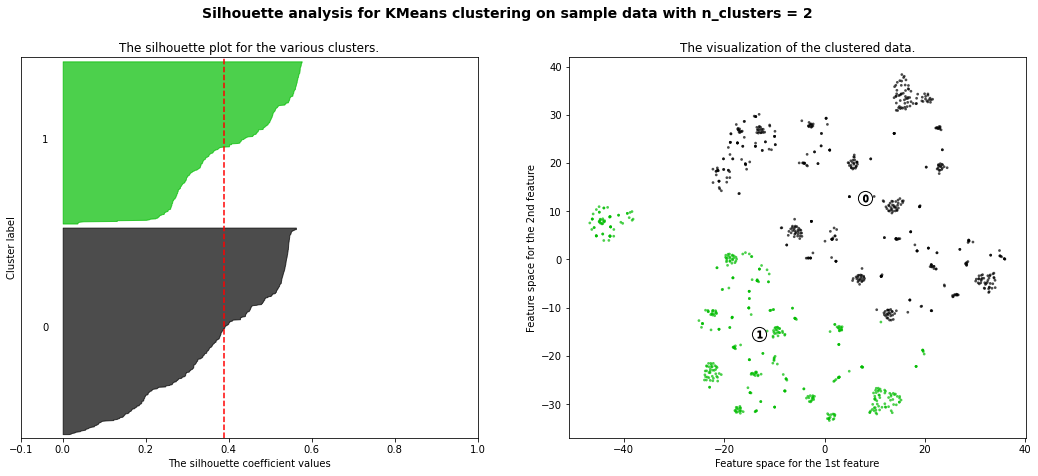

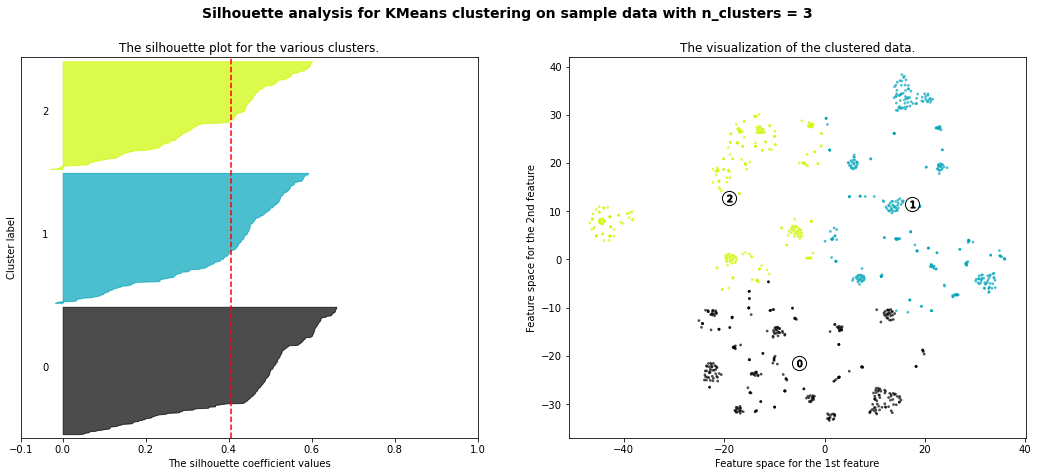

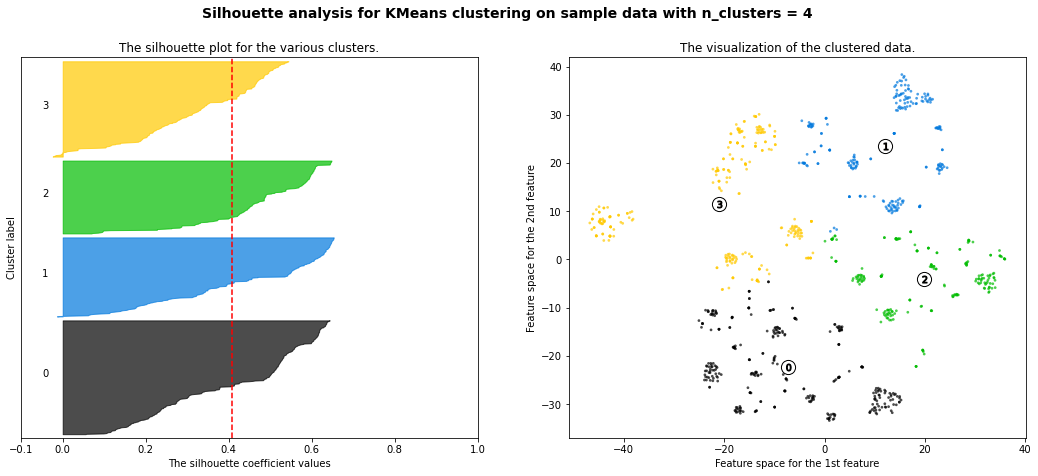

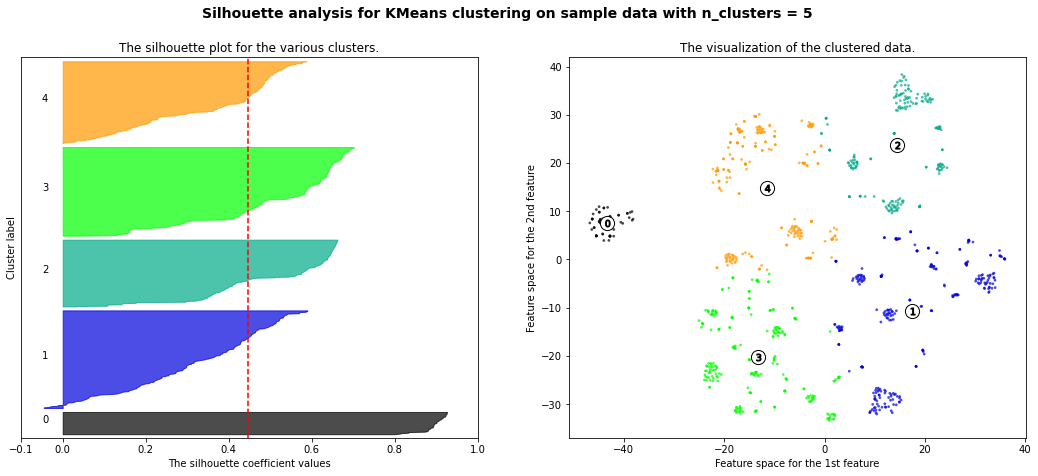

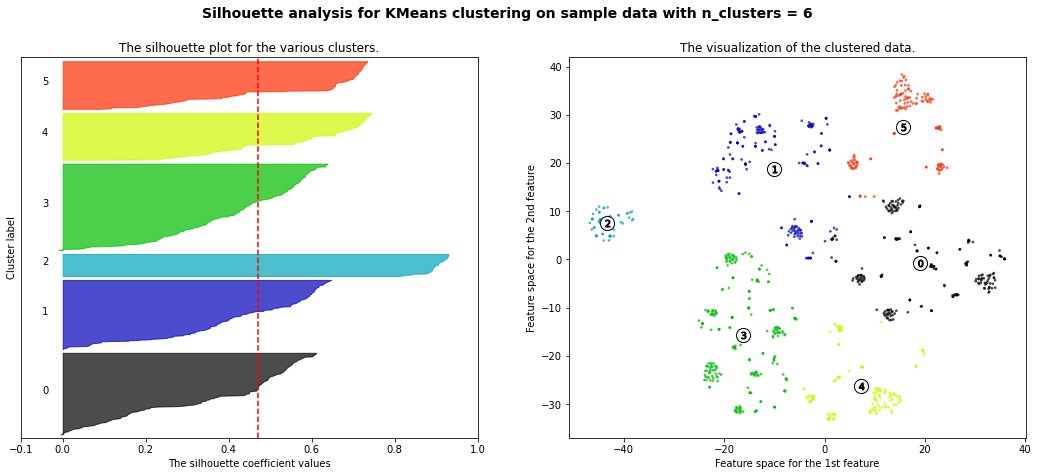

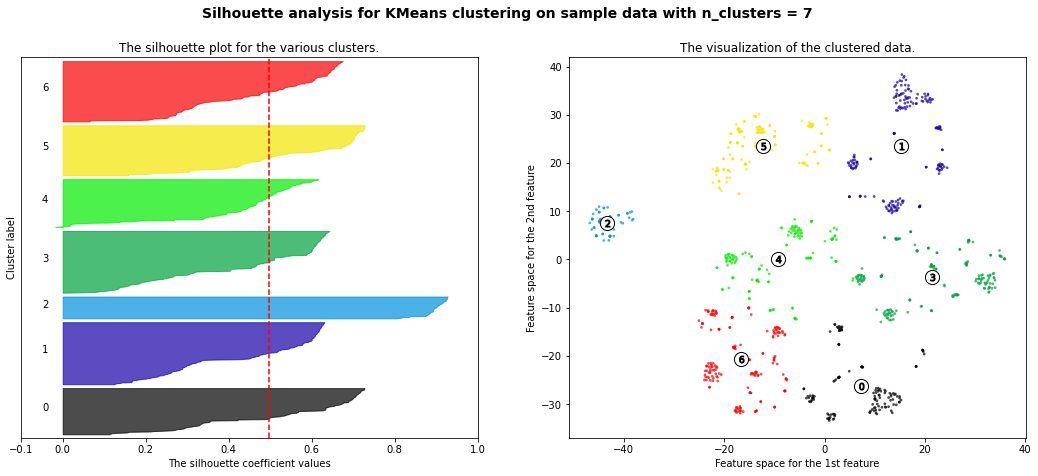

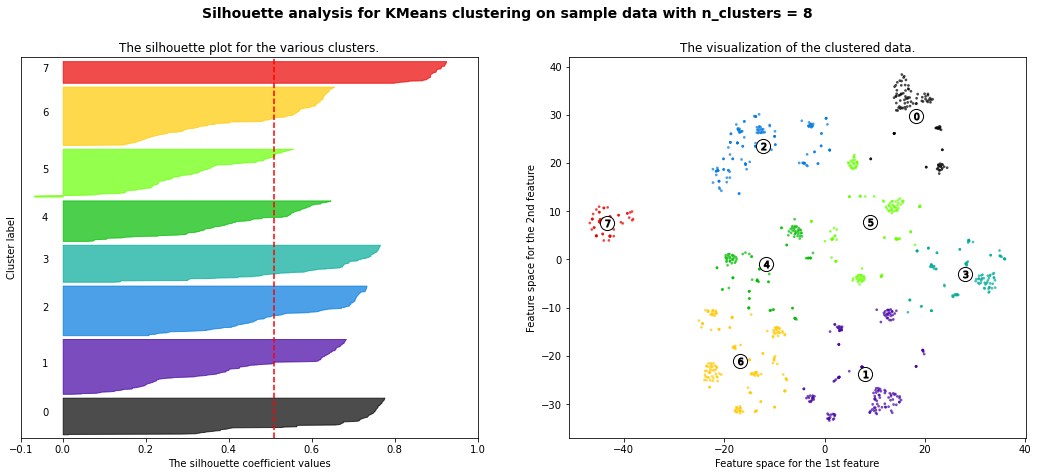

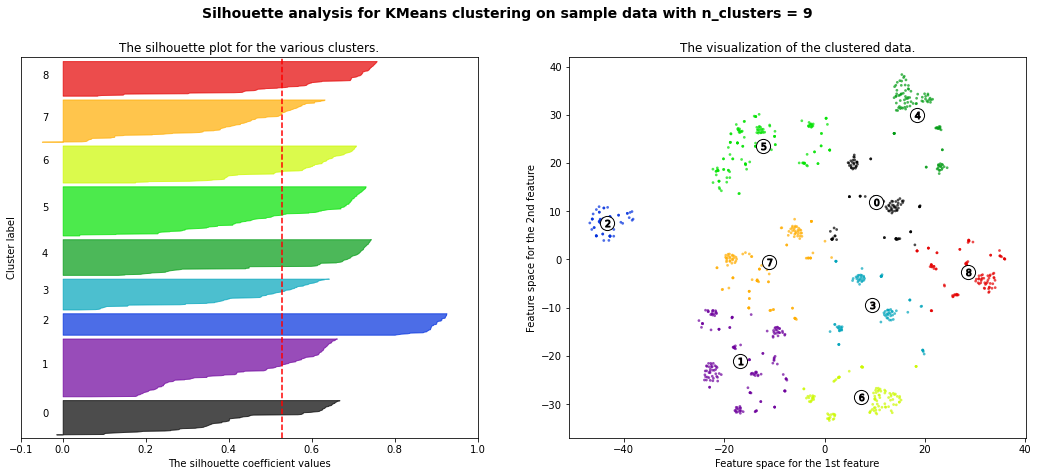

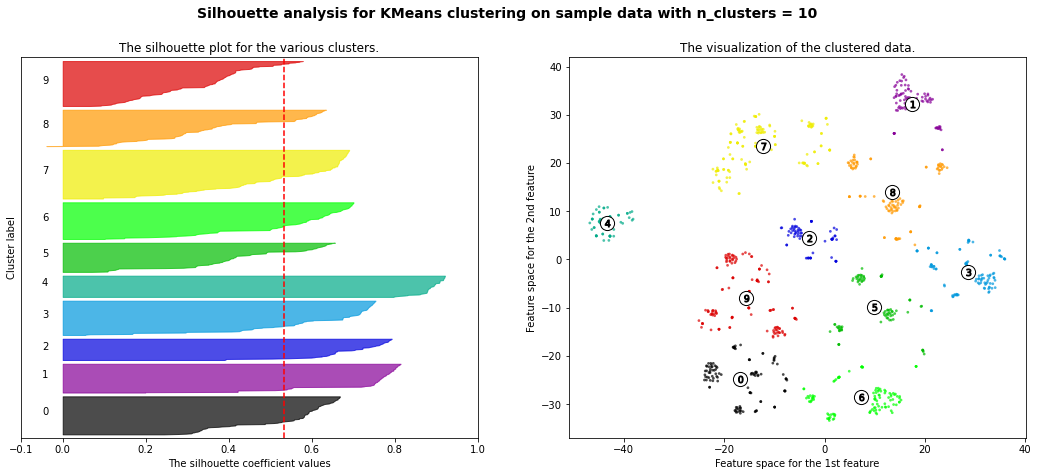

In [166]:
for n_clusters in range_n_clusters:
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подсюжет - это силуэтный сюжет
    # Коэффициент силуэта может варьироваться от -1, 1, но в этом примере все
    # лежат в пределах [-0,1, 1]
    ax1.set_xlim([-0.1, 1])
    # (N_clusters + 1) * 10 для вставки пробела между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и случайным генератором
    # семя из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X_tsne)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении сформированных
    # clusters
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Вычислить оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Сложите оценки силуэтов для образцов, принадлежащих
        # кластер i, и отсортируйте их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Обозначьте графики силуэтов номерами кластеров посередине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислить новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистить метки / отметки оси y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [169]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_tsne)
labels = kmeans.labels_

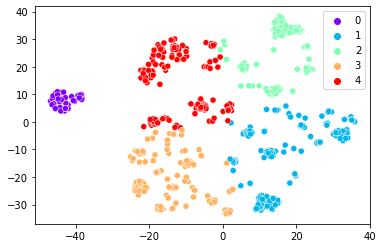

In [170]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [171]:
df_2['labels'] = labels

In [172]:
df_2.head()

,Sex,Job,Housing,Saving_accounts,Checking_account,Age,Credit_amount,Duration,labels
0,1,2,1,0,1,0.857143,0.050567,0.029412,1
1,0,2,1,1,2,0.053571,0.313690,0.647059,3
2,1,1,1,1,0,0.535714,0.101574,0.117647,2
3,1,2,0,1,1,0.464286,0.419941,0.558824,3
4,1,2,0,1,1,0.607143,0.254209,0.294118,3


In [173]:
df_2['labels'].value_counts(normalize=True).sort_index()

0    0.063
1    0.273
2    0.187
3    0.248
4    0.229
Name: labels, dtype: float64

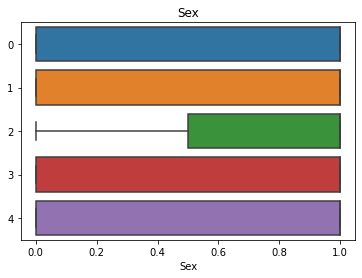

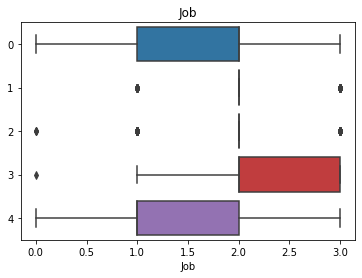

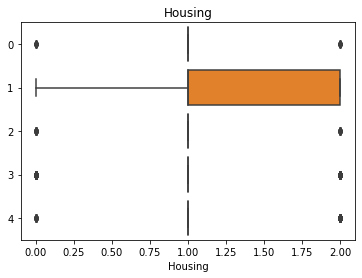

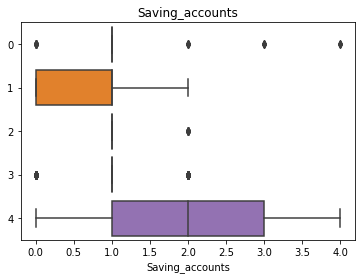

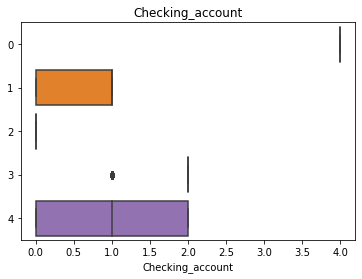

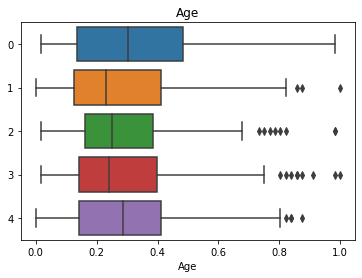

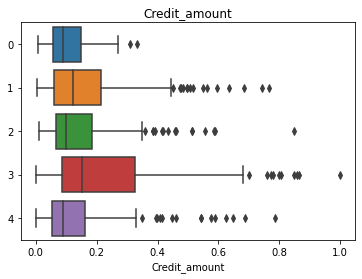

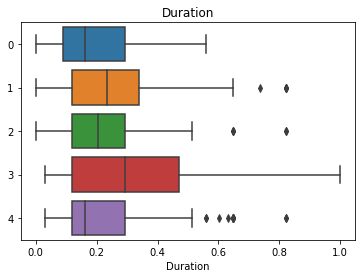

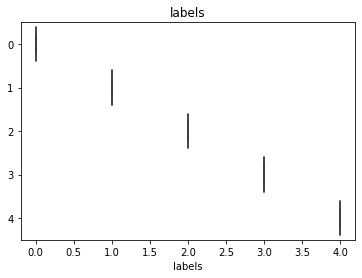

In [174]:
for col in df_2.columns:
    sns.boxplot(data=df_2, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [175]:
df_2.groupby('labels').median().T.round(2)

labels,0,1,2,3,4
Sex,1.00,1.00,1.00,1.00,1.00
Job,2.00,2.00,2.00,2.00,1.00
Housing,1.00,1.00,1.00,1.00,1.00
Saving_accounts,1.00,1.00,1.00,1.00,2.00
Checking_account,4.00,1.00,0.00,2.00,1.00
Age,0.30,0.23,0.25,0.24,0.29
Credit_amount,0.09,0.12,0.10,0.15,0.09
Duration,0.16,0.24,0.21,0.29,0.16


In [176]:
#Попробуем РСА для уменьшения размерности

In [177]:
df_3=df_2.drop(['labels'],axis=1)
df_3.head()

,Sex,Job,Housing,Saving_accounts,Checking_account,Age,Credit_amount,Duration
0,1,2,1,0,1,0.857143,0.050567,0.029412
1,0,2,1,1,2,0.053571,0.313690,0.647059
2,1,1,1,1,0,0.535714,0.101574,0.117647
3,1,2,0,1,1,0.464286,0.419941,0.558824
4,1,2,0,1,1,0.607143,0.254209,0.294118


In [178]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_3)

PCA()

In [179]:
pca.explained_variance_ratio_

array([0.38638995, 0.29479749, 0.13887709, 0.09472578, 0.05786408,
       0.01317574, 0.01105572, 0.00311415])

In [180]:
np.cumsum(pca.explained_variance_ratio_)

array([0.38638995, 0.68118744, 0.82006453, 0.91479031, 0.97265439,
       0.98583013, 0.99688585, 1.        ])

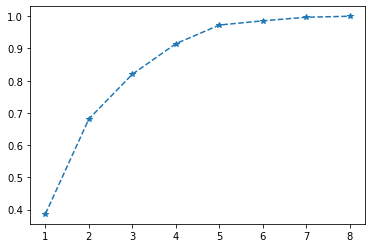

In [181]:
plt.plot(range(1, 9), np.cumsum(pca.explained_variance_ratio_), '*--');

In [182]:
x_pca = PCA(n_components=5).fit_transform(df_3)
x_pca.shape

(1000, 5)

In [183]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(x_pca)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\zhuko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


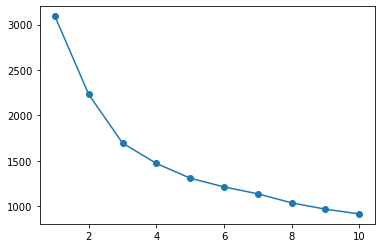

In [184]:
plt.plot(range(1,11), inertia, marker='o');

In [185]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

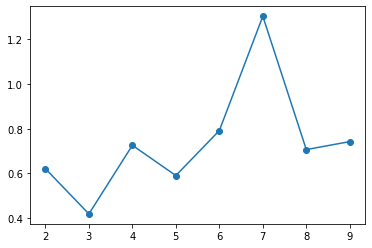

In [186]:
plt.plot(range(2,10), D, marker='o');

In [187]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.29015643511864025
For n_clusters = 3 The average silhouette_score is : 0.3226262637593013
For n_clusters = 4 The average silhouette_score is : 0.28725441504930327
For n_clusters = 5 The average silhouette_score is : 0.27601296983094586
For n_clusters = 6 The average silhouette_score is : 0.2617735135226941
For n_clusters = 7 The average silhouette_score is : 0.23930138179036342
For n_clusters = 8 The average silhouette_score is : 0.27275746034546305
For n_clusters = 9 The average silhouette_score is : 0.29034417636382465
For n_clusters = 10 The average silhouette_score is : 0.2895638864405906


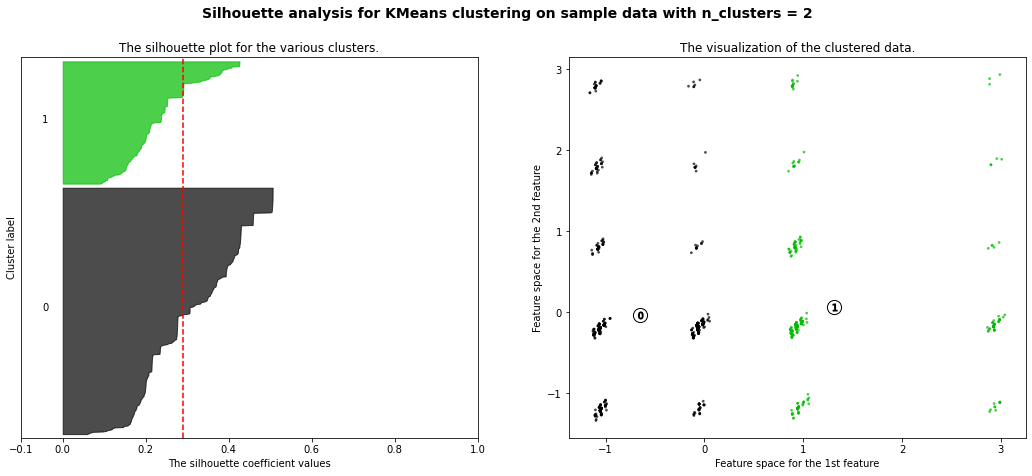

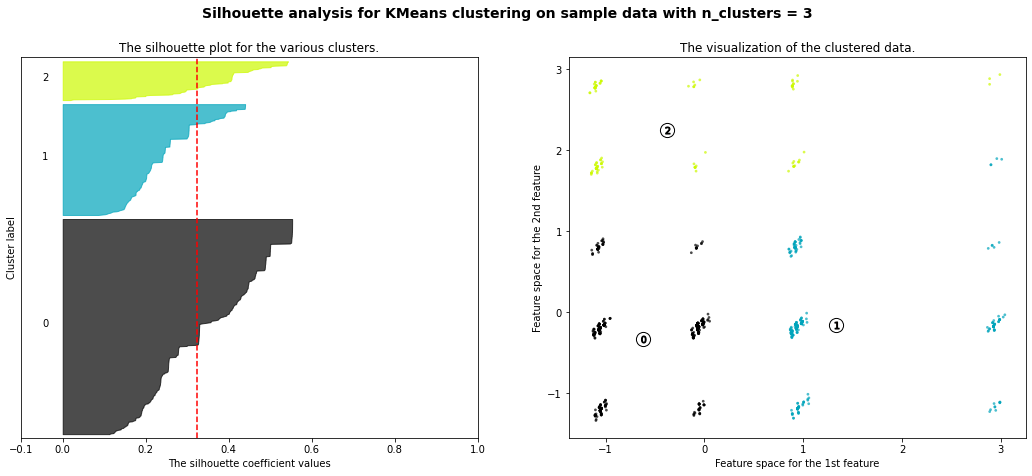

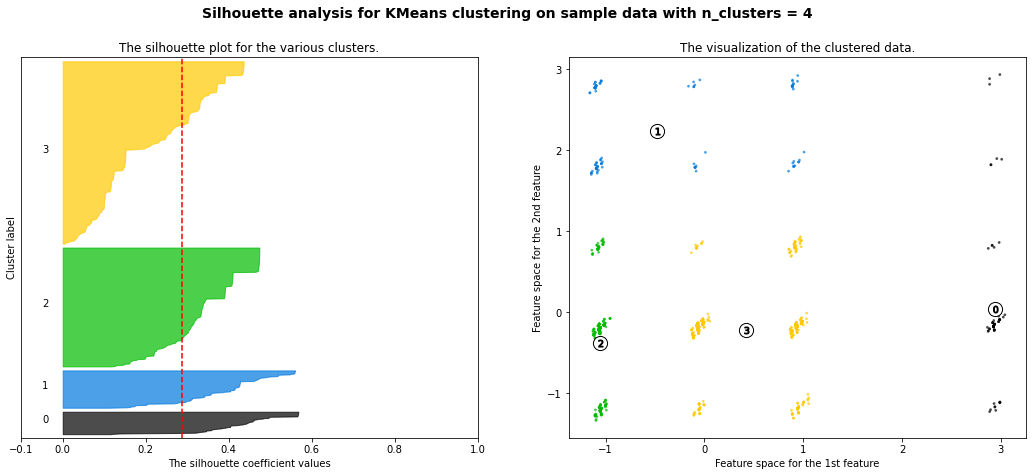

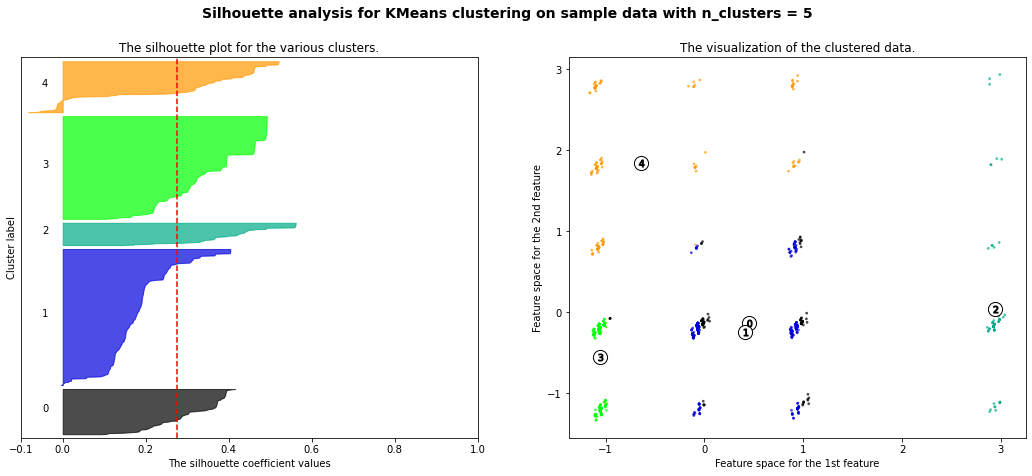

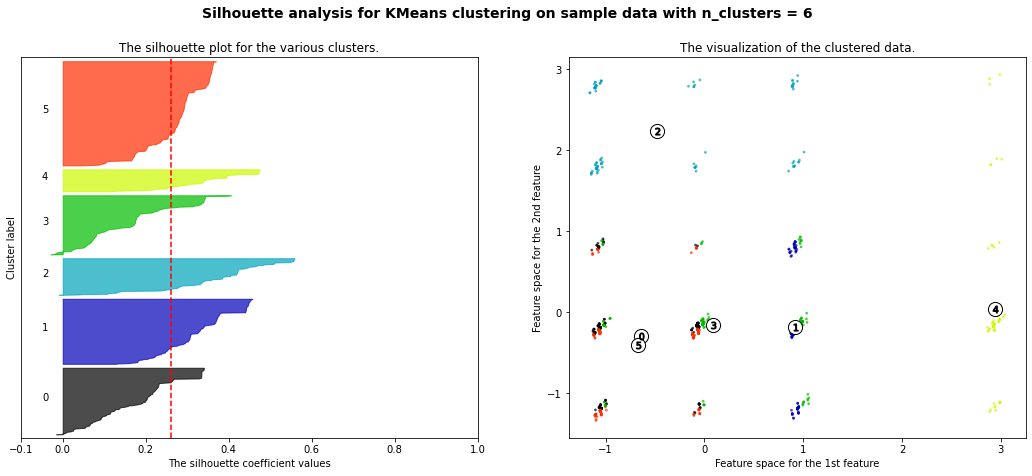

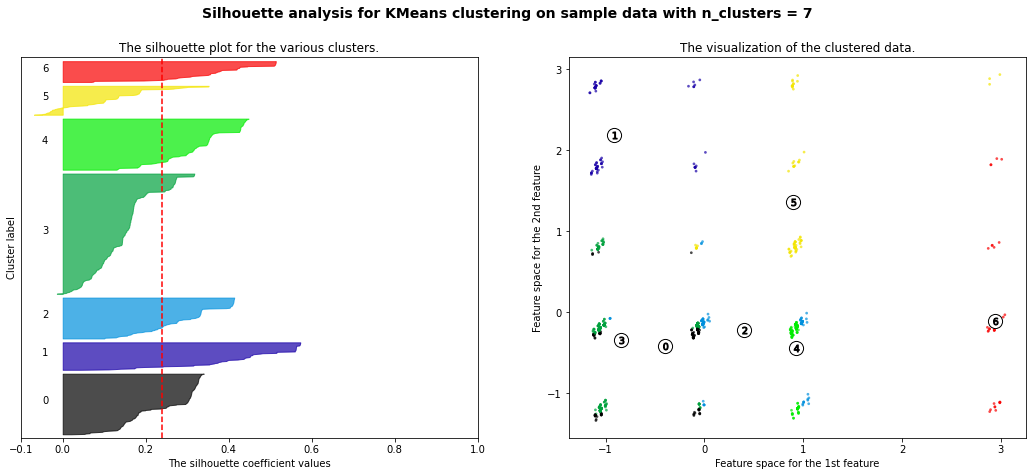

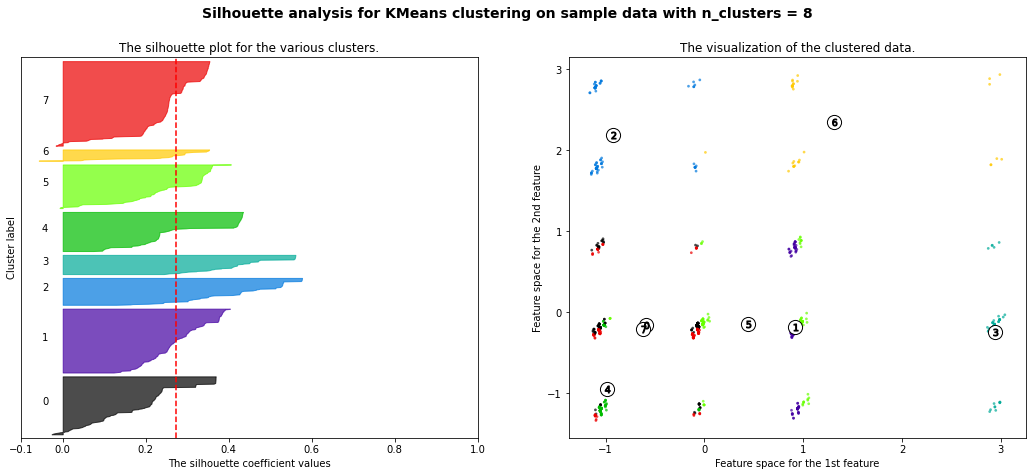

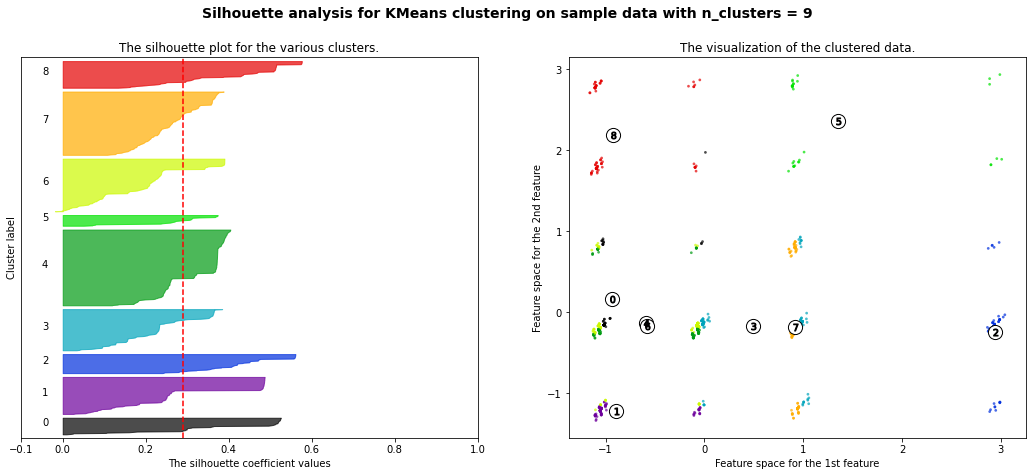

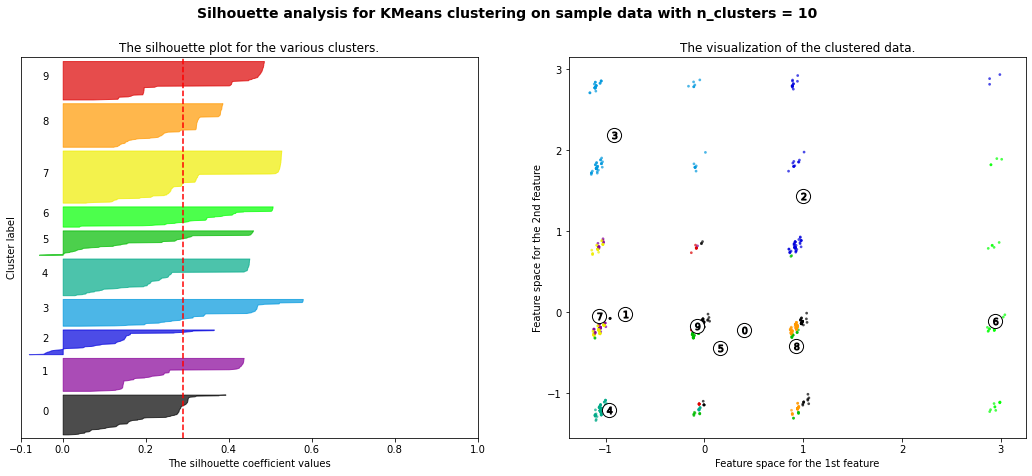

In [188]:
for n_clusters in range_n_clusters:
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подсюжет - это силуэтный сюжет
    # Коэффициент силуэта  в этом примере 
    # лежит в пределах [-0,1, 1]
    ax1.set_xlim([-0.1, 1])
    # (N_clusters + 1) * 10 для вставки пробела между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(x_pca) + (n_clusters + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и случайным генератором
    # семя из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(x_pca)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении сформированных
    # clusters
    silhouette_avg = silhouette_score(x_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Вычислить оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(x_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Сложите оценки силуэтов для образцов, принадлежащих
        # кластер i, и отсортируйте их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Обозначьте графики силуэтов номерами кластеров посередине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислить новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистить метки / отметки оси y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x_pca[:, 0], x_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [189]:
#Здесь попробуем количество кластеров =2

In [190]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(x_pca)
labels = kmeans.labels_

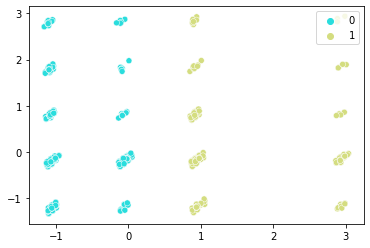

In [191]:
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels, palette='rainbow');

In [192]:
df_3['labels'] = labels

In [193]:
df_3['labels'].value_counts(normalize=True).sort_index()

0    0.668
1    0.332
Name: labels, dtype: float64

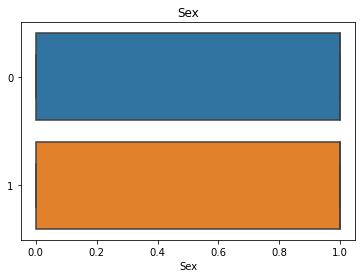

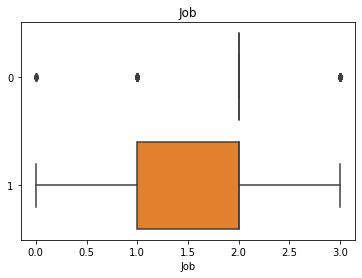

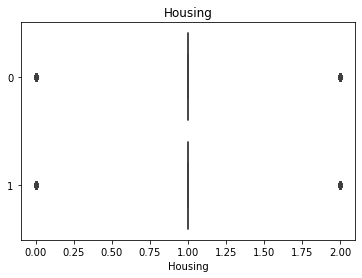

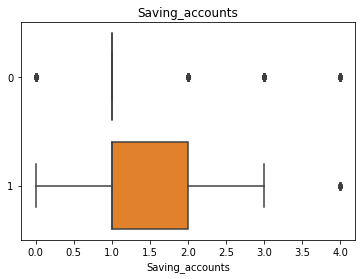

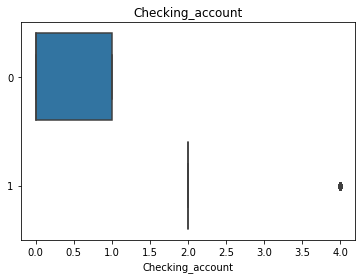

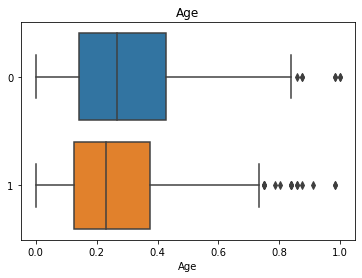

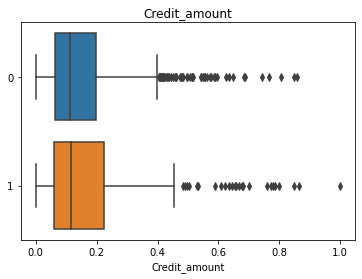

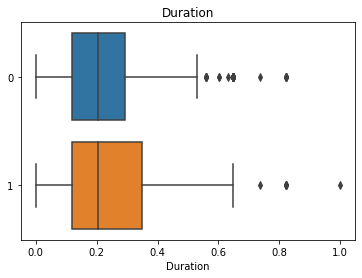

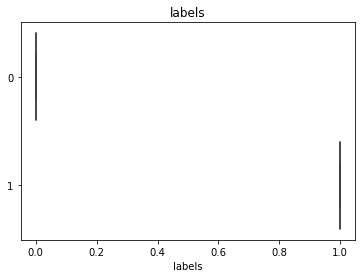

In [194]:
for col in df_3.columns:
    sns.boxplot(data=df_3, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [195]:
df_3.groupby('labels').median().T.round(2)

labels,0,1
Sex,1.00,1.00
Job,2.00,2.00
Housing,1.00,1.00
Saving_accounts,1.00,1.00
Checking_account,0.00,2.00
Age,0.27,0.23
Credit_amount,0.11,0.11
Duration,0.21,0.21


In [196]:
#Попробуем umap  

In [65]:
!pip install umap-learn

In [197]:
import umap

In [198]:
df_4=df_3.drop(['labels'],axis=1)
df_4.head()

,Sex,Job,Housing,Saving_accounts,Checking_account,Age,Credit_amount,Duration
0,1,2,1,0,1,0.857143,0.050567,0.029412
1,0,2,1,1,2,0.053571,0.313690,0.647059
2,1,1,1,1,0,0.535714,0.101574,0.117647
3,1,2,0,1,1,0.464286,0.419941,0.558824
4,1,2,0,1,1,0.607143,0.254209,0.294118


In [199]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               1000 non-null   int32  
 1   Job               1000 non-null   int64  
 2   Housing           1000 non-null   int32  
 3   Saving_accounts   1000 non-null   int64  
 4   Checking_account  1000 non-null   int64  
 5   Age               1000 non-null   float64
 6   Credit_amount     1000 non-null   float64
 7   Duration          1000 non-null   float64
dtypes: float64(3), int32(2), int64(3)
memory usage: 54.8 KB


In [200]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_4)

In [201]:
embedding.shape

(1000, 2)

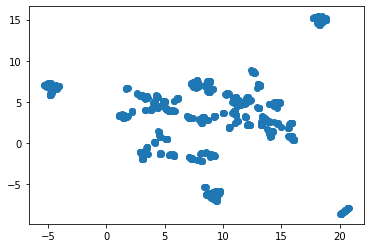

In [202]:
plt.scatter(embedding[:, 0], embedding[:, 1])

In [203]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(embedding)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

C:\Users\zhuko\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


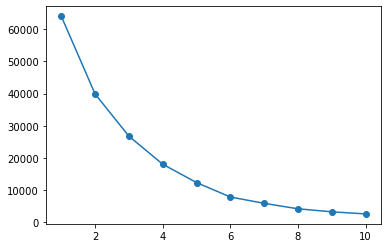

In [204]:
plt.plot(range(1,11), inertia, marker='o');

In [205]:
D = []
for i in range(1,9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

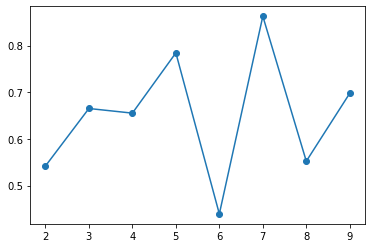

In [75]:
plt.plot(range(2,10), D, marker='o');

In [206]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

For n_clusters = 2 The average silhouette_score is : 0.37372658
For n_clusters = 3 The average silhouette_score is : 0.43056378
For n_clusters = 4 The average silhouette_score is : 0.4846117
For n_clusters = 5 The average silhouette_score is : 0.52887887
For n_clusters = 6 The average silhouette_score is : 0.554521
For n_clusters = 7 The average silhouette_score is : 0.55134743
For n_clusters = 8 The average silhouette_score is : 0.54592824
For n_clusters = 9 The average silhouette_score is : 0.55083376
For n_clusters = 10 The average silhouette_score is : 0.58482856


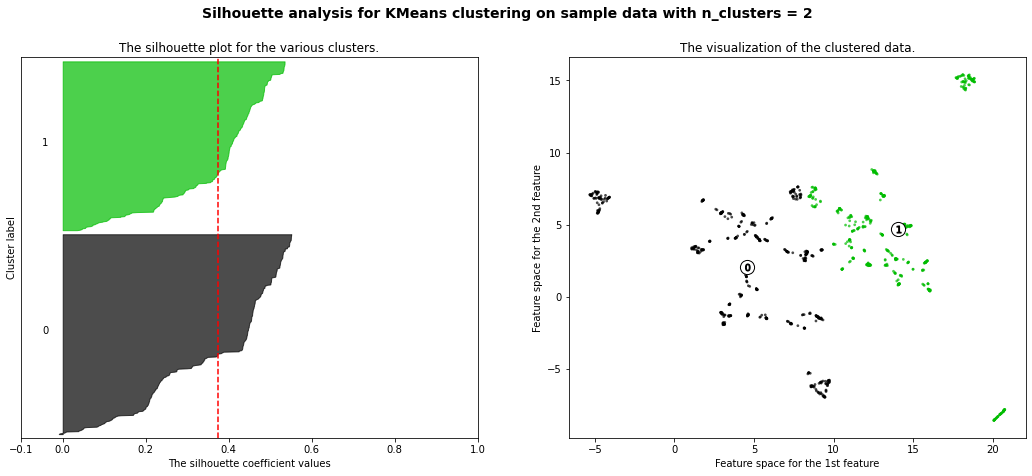

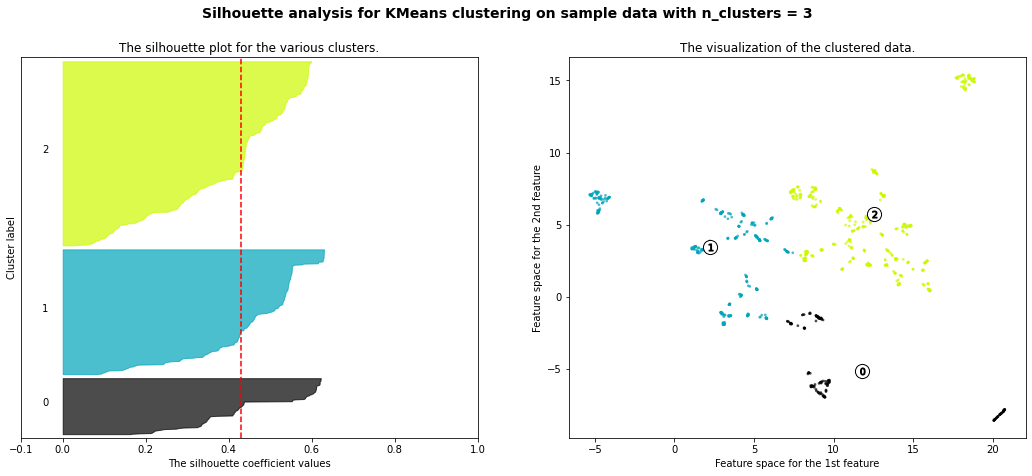

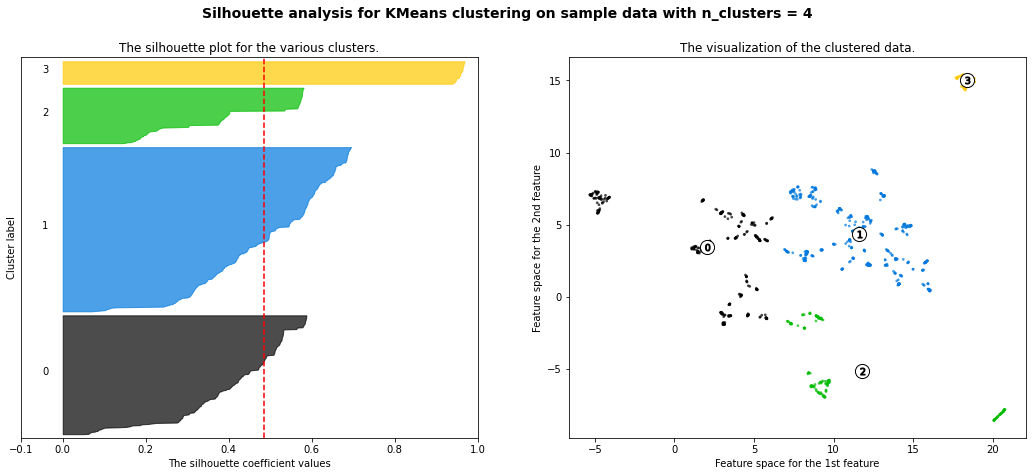

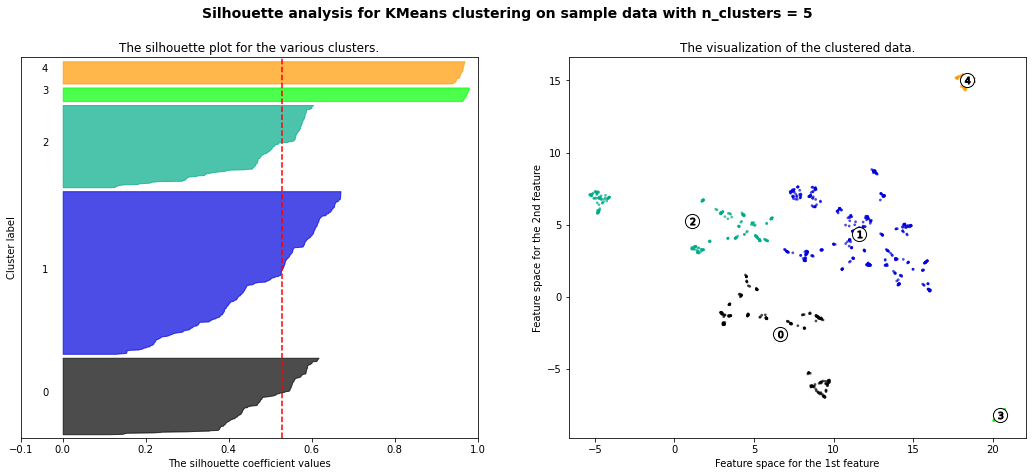

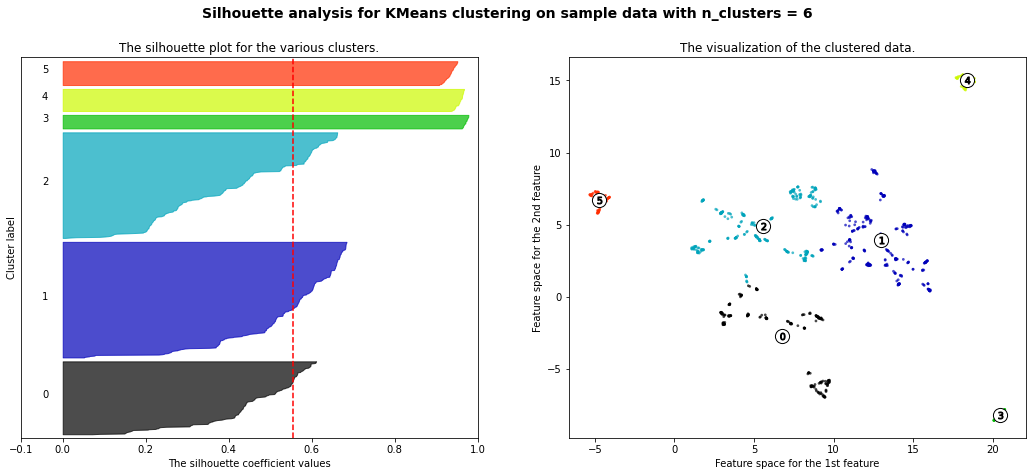

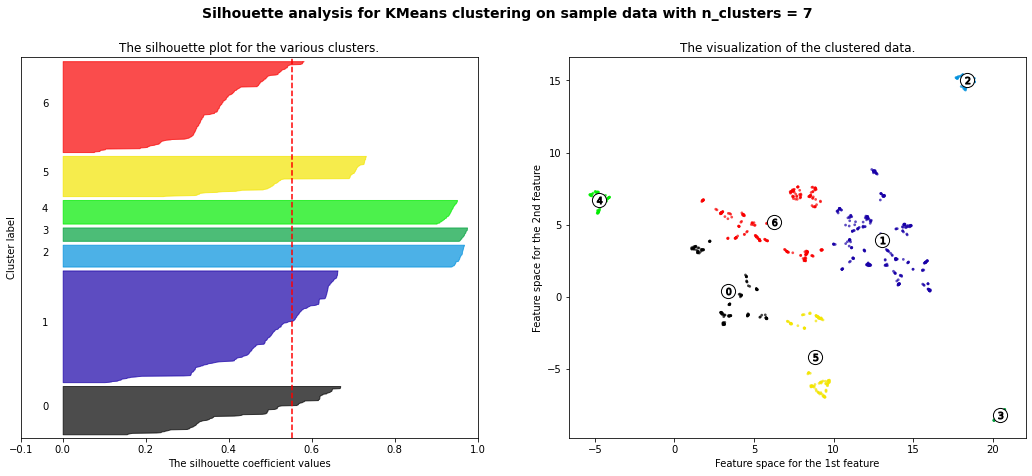

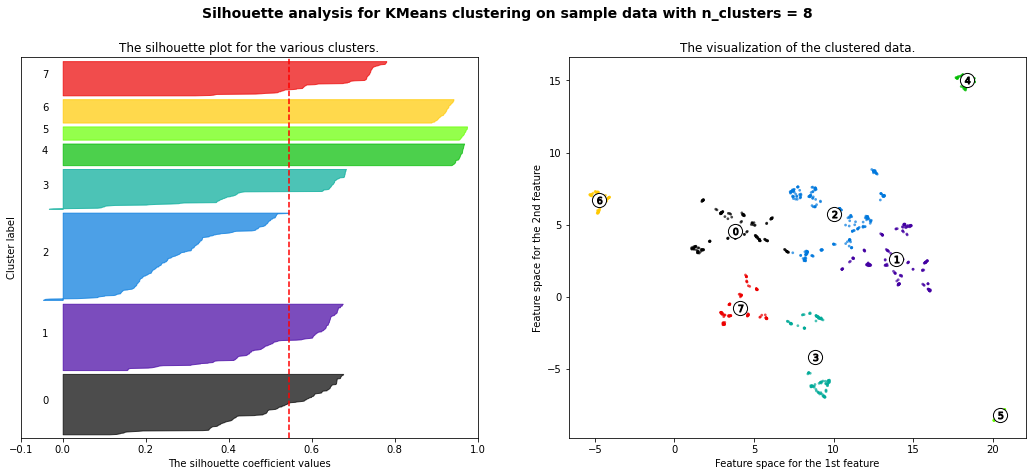

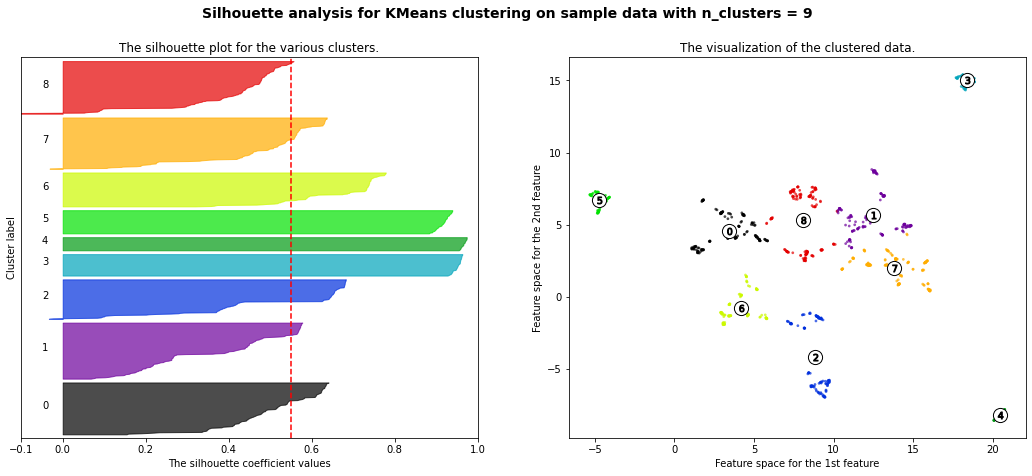

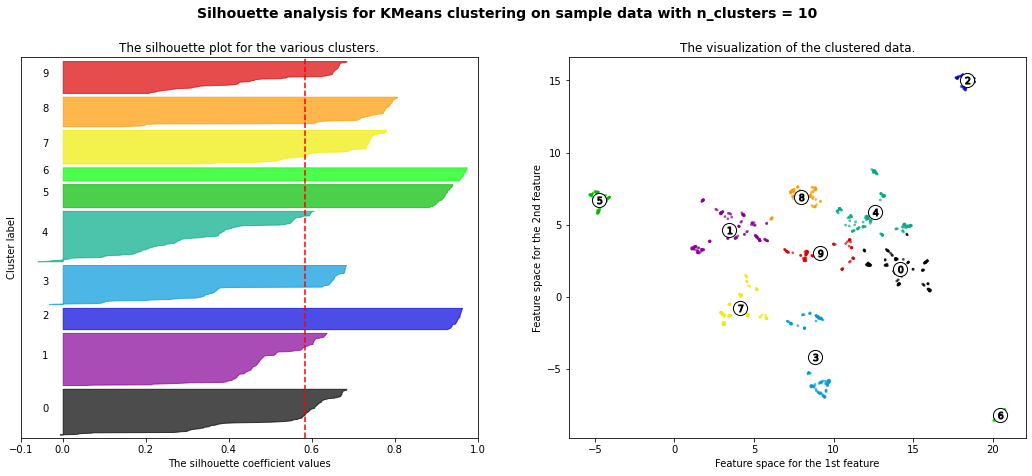

In [207]:
for n_clusters in range_n_clusters:
    # Создайте подзаголовок с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подсюжет - это силуэтный сюжет
    # Коэффициент силуэта  в этом примере 
    # лежит в пределах [-0,1, 1]
    ax1.set_xlim([-0.1, 1])
    # (N_clusters + 1) * 10 для вставки пробела между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(embedding) + (n_clusters + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и случайным генератором
    # семя из 10 для воспроизводимости.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(embedding)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении сформированных
    # clusters
    silhouette_avg = silhouette_score(embedding, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Вычислить оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(embedding, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Сложите оценки силуэтов для образцов, принадлежащих
        # кластер i, и отсортируйте их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Обозначьте графики силуэтов номерами кластеров посередине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислить новый y_lower для следующего графика
        y_lower = y_upper + 10  # 10 для 0 образцов

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистить метки / отметки оси y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(embedding[:, 0], embedding[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Нарисуйте белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [208]:
#10 кластеров классно отделяют, но возьму все же 7.

In [209]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(embedding)
labels = kmeans.labels_

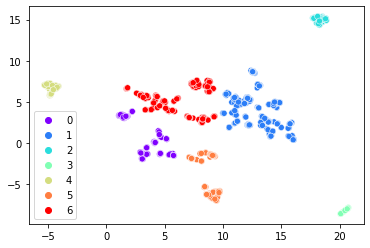

In [210]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels, palette='rainbow');

In [211]:
df_4['labels'] = labels
df_4['labels'].value_counts(normalize=True).sort_index()

0    0.138
1    0.318
2    0.063
3    0.039
4    0.068
5    0.115
6    0.259
Name: labels, dtype: float64

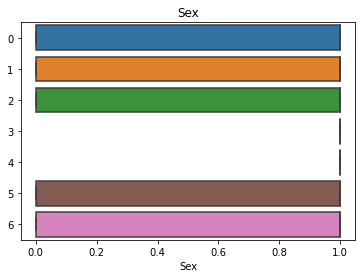

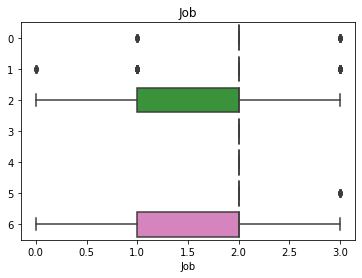

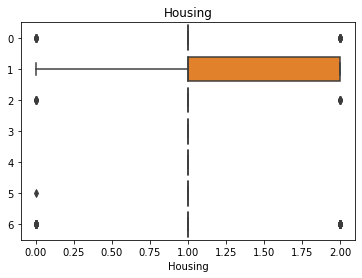

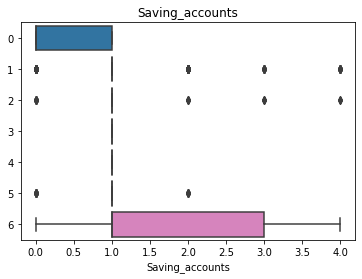

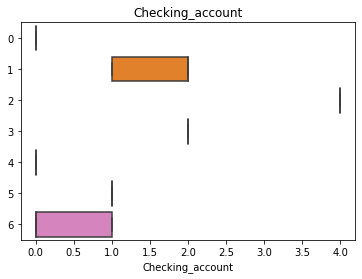

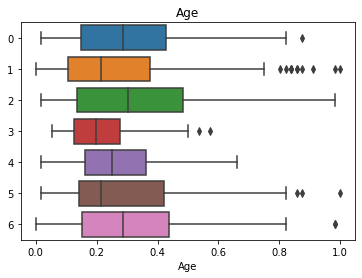

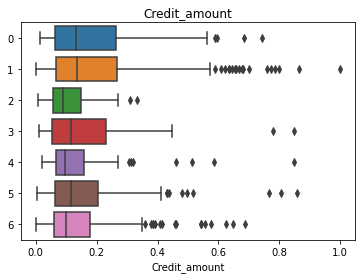

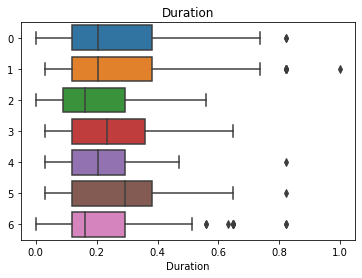

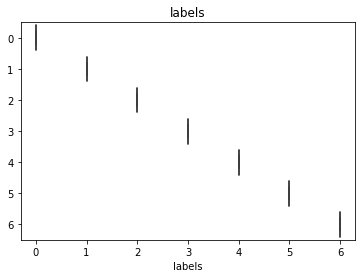

In [212]:
for col in df_4.columns:
    sns.boxplot(data=df_4, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [213]:
df_4.groupby('labels').median().T.round(2)

labels,0,1,2,3,4,5,6
Sex,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Job,2.00,2.00,2.00,2.00,2.00,2.00,2.00
Housing,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Saving_accounts,0.00,1.00,1.00,1.00,1.00,1.00,1.00
Checking_account,0.00,2.00,4.00,2.00,0.00,1.00,0.00
Age,0.29,0.21,0.30,0.20,0.25,0.21,0.29
Credit_amount,0.13,0.14,0.09,0.12,0.10,0.12,0.10
Duration,0.21,0.21,0.16,0.24,0.21,0.29,0.16


На мой взгляд для K_Means в целях сжатия признакового пространства наиболее подходит umap с дефолтными гиперпараметрами.
Данные отделяются наиболее качественно, их легко интепретировать как по цифрам, так и по boxplot'ам.

In [214]:
#hierarhical в задании это похоже имеется в виду иерархическая агломерационная кластеризация (AgglomerativeClustering).

In [215]:
df_5=df_4.drop(['labels'],axis=1)
df_5.head()

,Sex,Job,Housing,Saving_accounts,Checking_account,Age,Credit_amount,Duration
0,1,2,1,0,1,0.857143,0.050567,0.029412
1,0,2,1,1,2,0.053571,0.313690,0.647059
2,1,1,1,1,0,0.535714,0.101574,0.117647
3,1,2,0,1,1,0.464286,0.419941,0.558824
4,1,2,0,1,1,0.607143,0.254209,0.294118


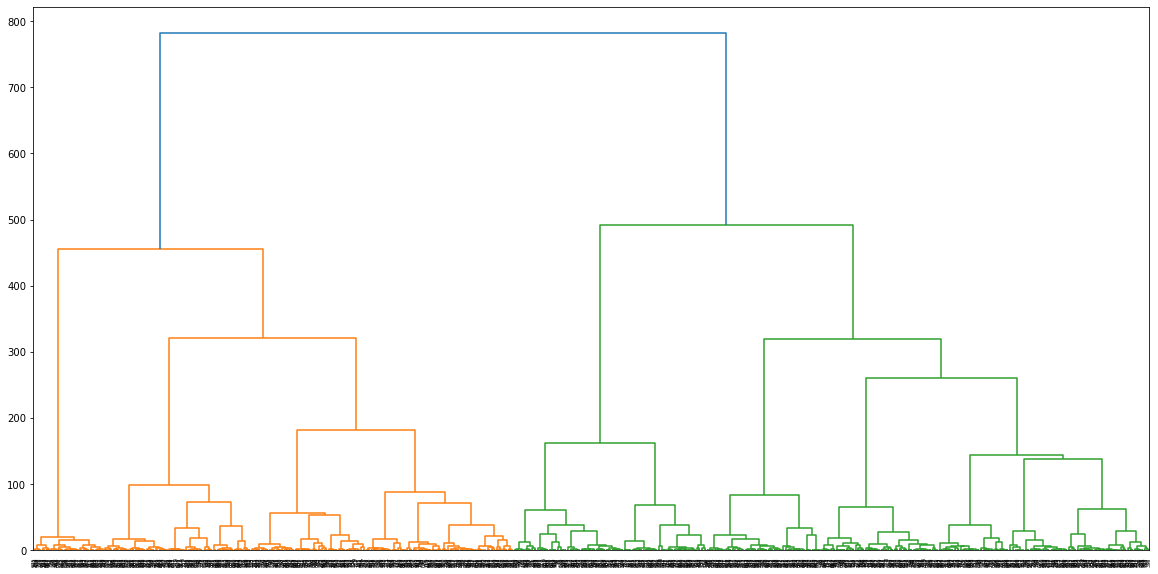

In [216]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_tsne, method='ward')
dendrogram_ = dendrogram(linkage_)

In [217]:
from tqdm import tqdm
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_tsne)
    labels = agg.labels_
    score = silhouette_score(X_tsne, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 27.44it/s]


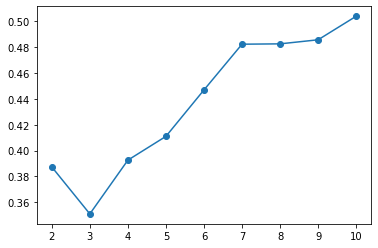

In [218]:
plt.plot(range(2,11), silhouette, marker='o');

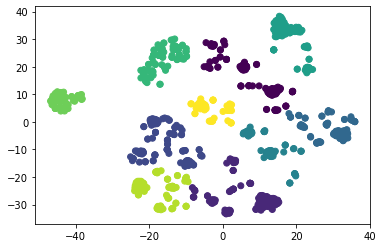

In [89]:
agg = AgglomerativeClustering(n_clusters=10).fit(X_tsne)
labels = agg.labels_

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

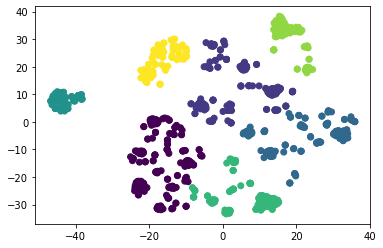

In [219]:
agg = AgglomerativeClustering(n_clusters=7).fit(X_tsne)
labels = agg.labels_

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

In [220]:
#Выбираю количество кластеров=7

In [221]:
df_5['labels'] = labels
df_5['labels'].value_counts(normalize=True).sort_index()

0    0.235
1    0.189
2    0.173
3    0.063
4    0.132
5    0.104
6    0.104
Name: labels, dtype: float64

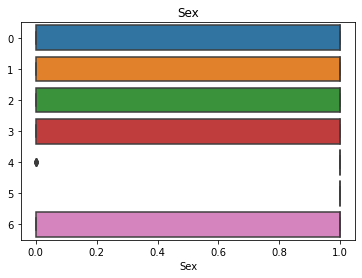

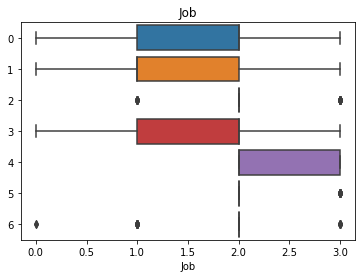

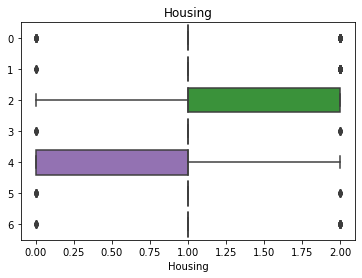

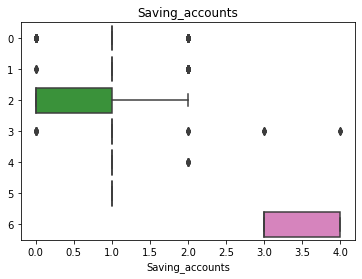

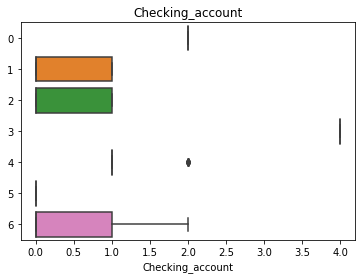

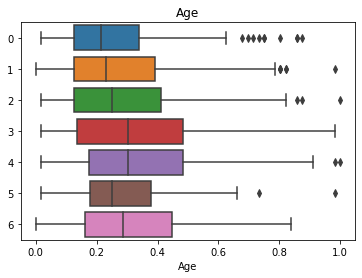

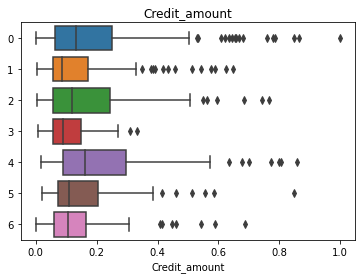

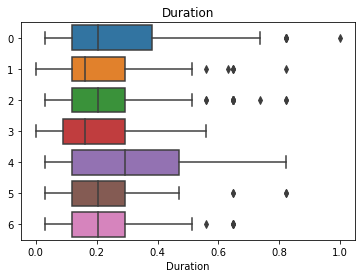

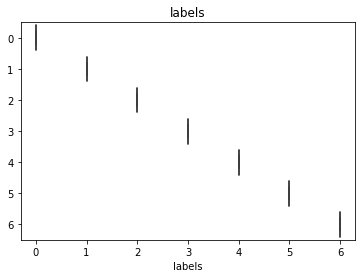

In [222]:
for col in df_5.columns:
    sns.boxplot(data=df_5, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [223]:
df_5.groupby('labels').median().T.round(2)

labels,0,1,2,3,4,5,6
Sex,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Job,2.00,1.00,2.00,2.00,2.00,2.00,2.00
Housing,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Saving_accounts,1.00,1.00,0.00,1.00,1.00,1.00,3.00
Checking_account,2.00,0.00,0.00,4.00,1.00,0.00,0.00
Age,0.21,0.23,0.25,0.30,0.30,0.25,0.29
Credit_amount,0.13,0.09,0.12,0.09,0.16,0.11,0.11
Duration,0.21,0.16,0.21,0.16,0.29,0.21,0.21


In [224]:
df_6=df_5.drop(['labels'],axis=1)
df_6.head()

,Sex,Job,Housing,Saving_accounts,Checking_account,Age,Credit_amount,Duration
0,1,2,1,0,1,0.857143,0.050567,0.029412
1,0,2,1,1,2,0.053571,0.313690,0.647059
2,1,1,1,1,0,0.535714,0.101574,0.117647
3,1,2,0,1,1,0.464286,0.419941,0.558824
4,1,2,0,1,1,0.607143,0.254209,0.294118


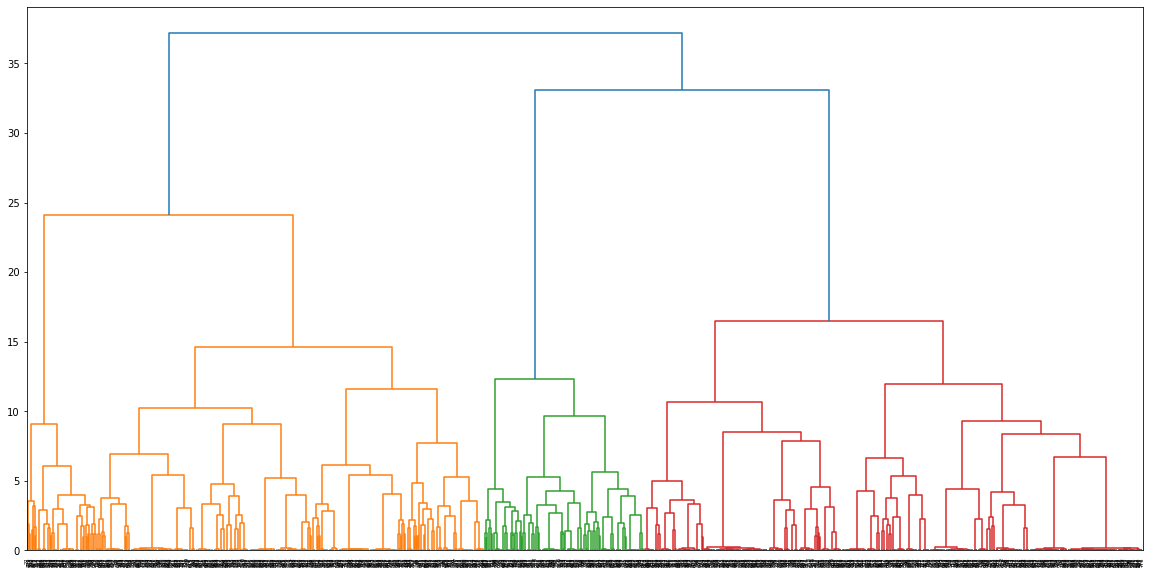

In [225]:
plt.figure(figsize=(20,10))
linkage_ = linkage(x_pca, method='ward')
dendrogram_ = dendrogram(linkage_)

In [226]:
from tqdm import tqdm
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(x_pca)
    labels = agg.labels_
    score = silhouette_score(x_pca, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 29.13it/s]


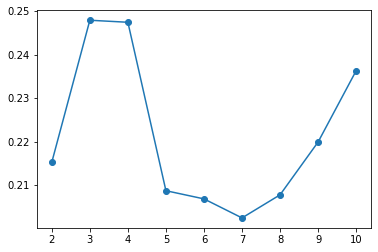

In [227]:
plt.plot(range(2,11), silhouette, marker='o');

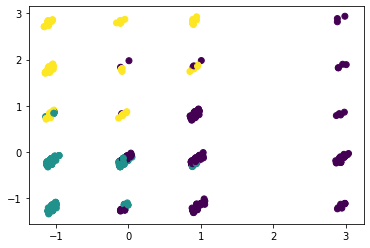

In [228]:
agg = AgglomerativeClustering(n_clusters=3).fit(x_pca)
labels = agg.labels_

plt.scatter(x_pca[:,0], x_pca[:,1], c=labels);

In [229]:
#РСА с данным методом кластеризации, видимо, "не очень дружит" с данным числом n_component=5.

In [230]:
#Попробуем umap.

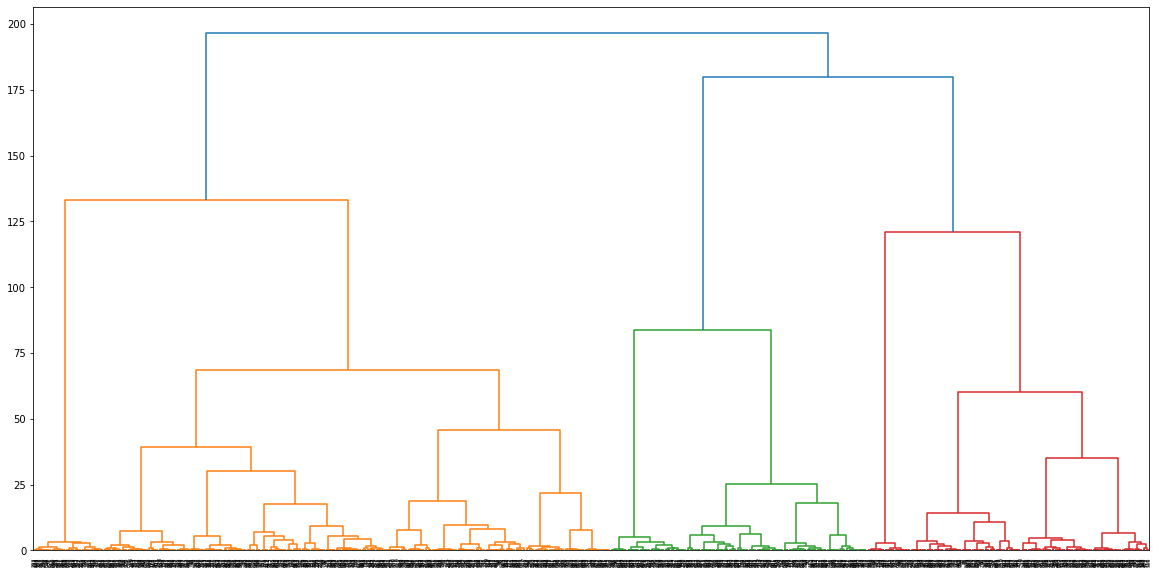

In [231]:
plt.figure(figsize=(20,10))
linkage_ = linkage(embedding, method='ward')
dendrogram_ = dendrogram(linkage_)

In [232]:
from tqdm import tqdm
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(embedding)
    labels = agg.labels_
    score = silhouette_score(embedding, labels)
    silhouette.append(score)

100%|██████████| 9/9 [00:00<00:00, 28.94it/s]


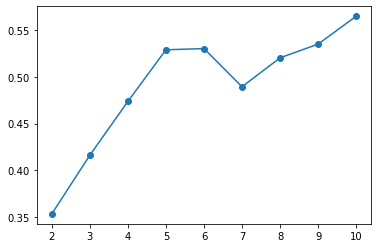

In [233]:
plt.plot(range(2,11), silhouette, marker='o');

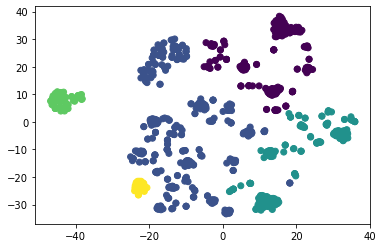

In [237]:
agg = AgglomerativeClustering(n_clusters=5).fit(embedding)
labels = agg.labels_

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

In [238]:
df_6['labels'] = labels
df_6['labels'].value_counts(normalize=True).sort_index()

0    0.230
1    0.454
2    0.214
3    0.063
4    0.039
Name: labels, dtype: float64

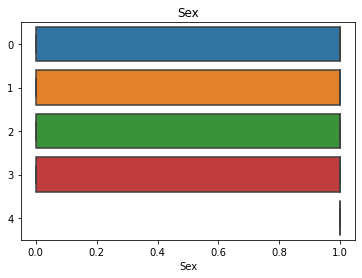

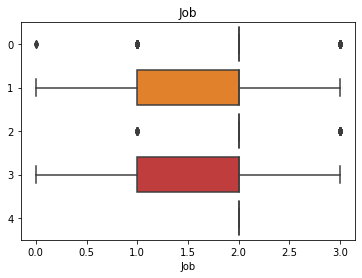

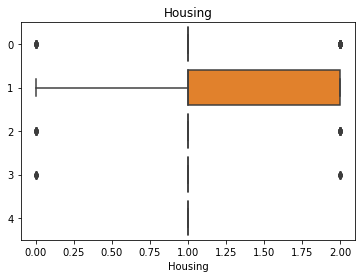

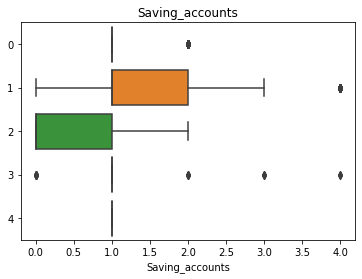

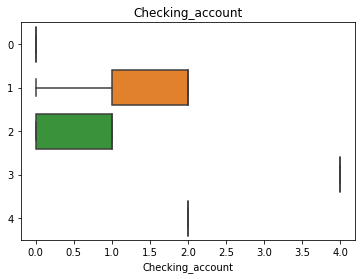

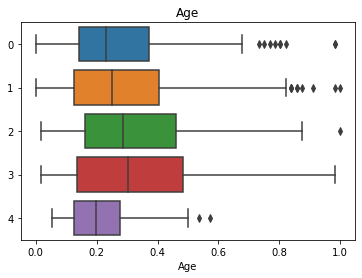

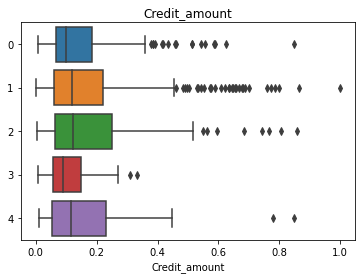

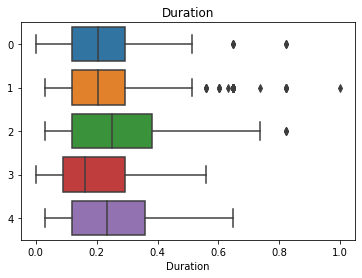

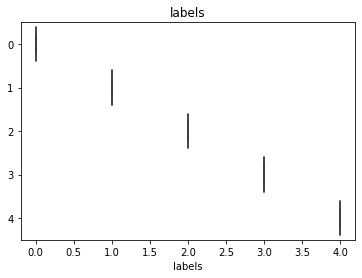

In [239]:
for col in df_6.columns:
    sns.boxplot(data=df_6, x=col, y=labels, orient='h')
    plt.title(col)
    plt.show();

In [240]:
df_6.groupby('labels').median().T.round(2)

labels,0,1,2,3,4
Sex,1.00,1.00,1.00,1.00,1.00
Job,2.00,2.00,2.00,2.00,2.00
Housing,1.00,1.00,1.00,1.00,1.00
Saving_accounts,1.00,1.00,0.00,1.00,1.00
Checking_account,0.00,2.00,1.00,4.00,2.00
Age,0.23,0.25,0.29,0.30,0.20
Credit_amount,0.10,0.12,0.12,0.09,0.12
Duration,0.21,0.21,0.25,0.16,0.24


#Попробуем dbscan

In [310]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_tsne)
labels = dbscan.labels_

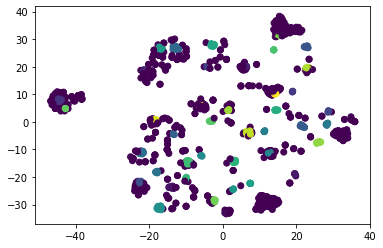

In [311]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

In [312]:
uniq_labels = np.unique(labels)
uniq_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

In [313]:
n_clusters = len(uniq_labels[uniq_labels != -1])
n_clusters

42

In [112]:
#Я бы сказал, что неплохо разделяет и со значениями по умолчанию.

In [316]:
def dbscan_clustering(eps_range, X_tsne):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X_tsne)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X_tsne, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 19/19 [00:00<00:00, 47.14it/s]


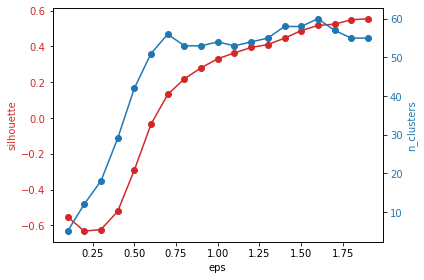

In [317]:
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, X_tsne)

100%|██████████| 13/13 [00:00<00:00, 45.61it/s]


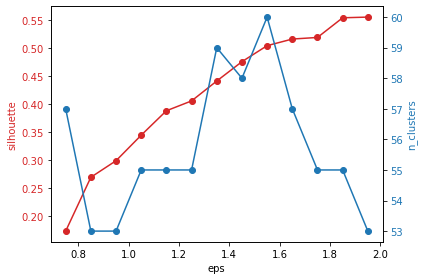

In [318]:
eps_range = np.arange(0.75,2,0.1)
dbscan_clustering(eps_range, X_tsne)

100%|██████████| 5/5 [00:00<00:00, 43.86it/s]


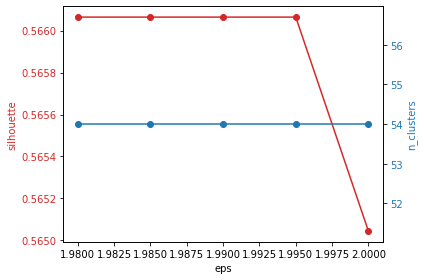

In [319]:
eps_range = np.arange(1.98,2.0,0.005)
dbscan_clustering(eps_range, X_tsne)

In [320]:
#Получилось неадекватное количество кластеров

кластеров: 54


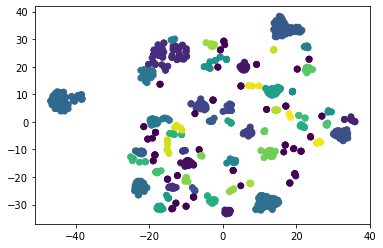

In [321]:
dbscan = DBSCAN(eps=1.98, min_samples=5).fit(X_tsne)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

In [ ]:
#Здесь видимо нужно подбирать другие гиперпараметры для tnse.

In [322]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(x_pca)
labels = dbscan.labels_

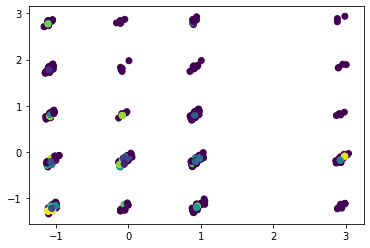

In [323]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels);

In [324]:
uniq_labels = np.unique(labels)
uniq_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [325]:
n_clusters = len(uniq_labels[uniq_labels != -1])
n_clusters

45

In [326]:
def dbscan_clustering(eps_range, x_pca):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(x_pca)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(x_pca, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 19/19 [00:00<00:00, 29.64it/s]


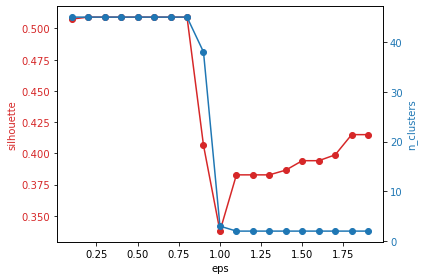

In [330]:
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, x_pca)

100%|██████████| 15/15 [00:00<00:00, 40.43it/s]


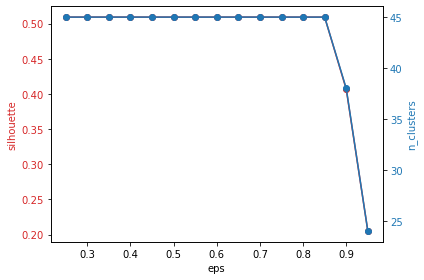

In [338]:
eps_range = np.arange(0.25,1,0.05)
dbscan_clustering(eps_range, x_pca)

кластеров: 38


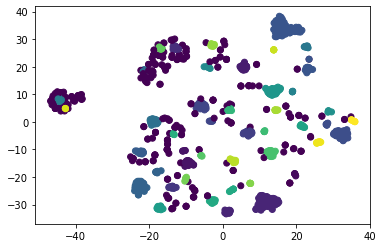

In [365]:
dbscan = DBSCAN(eps=0.9, min_samples=5).fit(x_pca)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

In [356]:
#Аналогичная картина с РСА. 

In [357]:
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(embedding)
labels = dbscan.labels_

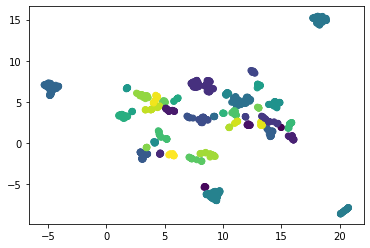

In [358]:
plt.scatter(embedding[:,0], embedding[:,1], c=labels);

In [359]:
uniq_labels = np.unique(labels)
uniq_labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [360]:
n_clusters = len(uniq_labels[uniq_labels != -1])
n_clusters

43

In [361]:
def dbscan_clustering(eps_range, embedding):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(embedding)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(embedding, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 19/19 [00:00<00:00, 38.00it/s]


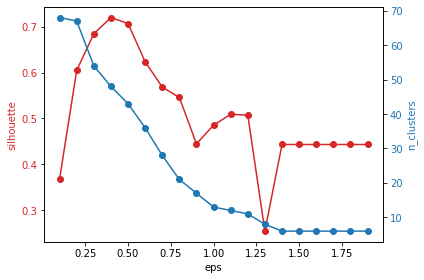

In [349]:
eps_range = np.arange(0.1,2,0.1)
dbscan_clustering(eps_range, embedding)

100%|██████████| 14/14 [00:00<00:00, 37.43it/s]


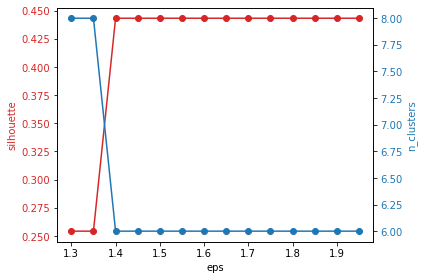

In [362]:
eps_range = np.arange(1.3,2,0.05)
dbscan_clustering(eps_range, embedding)

кластеров: 6


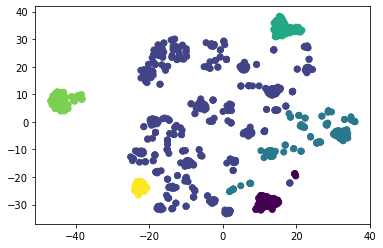

In [363]:
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(embedding)
labels = dbscan.labels_
uniq_labels = np.unique(labels)
n_clusters = len(uniq_labels[uniq_labels != -1])
print(f'кластеров: {n_clusters}')
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels);

"Немного получше". В целом для рассматриваемого датасета, DBSCAN показывает самые плохие результаты. Возможно, если
поиграться с гиперпараметрами для уменьшения размерности, то картина станет получше.
K_Means и AgglomerativeClustering справляются лучше с этим датасетом. Для уменьшения размерности лучше всего подошли 
tsne и umap.